In [19]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


数据聚合是数据处理的最后一步，通常是要使每一个数组生成一个单一的数值。
数据分类处理的核心：
+ groupby()函数
+ groups属性查看分组情况
# 数据分组是依据某一列或几列数据的内容是否相同进行分组处理
# 分组必聚合 mean sum max min

In [20]:
tip = pd.read_csv('/Users/fengliang/Documents/workspace/Pandas&Matplotlib/seaborn-data-master/tips.csv')
tip

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [21]:
# 按性别分组，查看给小费的差异,平均值
tip.groupby('sex')['total_bill'].mean()

sex
Female    18.056897
Male      20.744076
Name: total_bill, dtype: float64

In [33]:
# 支持多分组，按性别，吸烟分组，查看给小费的差异,平均值
tip.groupby(['sex','smoker'])['total_bill'].mean()

sex     smoker
Female  No        18.105185
        Yes       17.977879
Male    No        19.791237
        Yes       22.284500
Name: total_bill, dtype: float64

/Users/fengliang/anaconda3/envs/Pandas&Matplotlib/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/fengliang/anaconda3/envs/Pandas&Matplotlib/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/fengliang/anaconda3/envs/Pandas&Matplotlib/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='sex', ylabel='total_bill'>

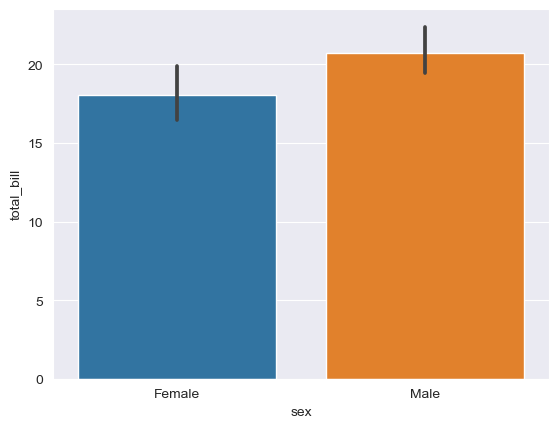

In [23]:
sns.barplot(x='sex',y='total_bill',data= tip)

In [24]:
# 统计男性女性的占比
tip.sex.value_counts()/tip.sex.value_counts().sum()

sex
Male      0.643443
Female    0.356557
Name: count, dtype: float64

In [36]:
obj = tip.groupby('sex')
obj.groups

{'Female': [0, 4, 11, 14, 16, 18, 21, 22, 29, 32, 33, 37, 51, 52, 57, 66, 67, 71, 72, 73, 74, 82, 85, 92, 93, 94, 100, 101, 102, 103, 104, 109, 111, 114, 115, 117, 118, 119, 121, 124, 125, 127, 128, 131, 132, 133, 134, 135, 136, 137, 139, 140, 143, 144, 145, 146, 147, 155, 157, 158, 162, 164, 168, 169, 178, 186, 188, 191, 197, 198, 201, 202, 203, 205, 209, 213, 214, 215, 219, 221, 223, 225, 226, 229, 238, 240, 243], 'Male': [1, 2, 3, 5, 6, 7, 8, 9, 10, 12, 13, 15, 17, 19, 20, 23, 24, 25, 26, 27, 28, 30, 31, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 53, 54, 55, 56, 58, 59, 60, 61, 62, 63, 64, 65, 68, 69, 70, 75, 76, 77, 78, 79, 80, 81, 83, 84, 86, 87, 88, 89, 90, 91, 95, 96, 97, 98, 99, 105, 106, 107, 108, 110, 112, 113, 116, 120, 122, 123, 126, 129, 130, 138, 141, 142, 148, 149, 150, 151, 152, 153, 154, 156, 159, ...]}

In [49]:
# 只有数值型的列才能聚合，聚合函数是统计学指标
obj.mean()['tip']

TypeError: agg function failed [how->mean,dtype->object]

In [50]:
tip.groupby('sex').mean()

TypeError: agg function failed [how->mean,dtype->object]

In [51]:
tip

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [52]:
# 统计约会数据中，每一天消费账单总金额
tip.groupby('day')['total_bill'].sum()

day
Fri      325.88
Sat     1778.40
Sun     1627.16
Thur    1096.33
Name: total_bill, dtype: float64